
# 🛍️ RFM Customer Segmentation with Feature Engineering

## 📌 Objective
Segment customers based on their purchasing behavior using **RFM analysis** and enhance the dataset with **temporal and behavioral features** to derive deeper insights for strategic marketing and personalization.


In [1]:
import pandas as pd

# Load the UCI Online Retail Dataset from a known online source

# Try loading the dataset
df = pd.read_excel("C:/Users/smogi/Downloads/Online Retail (1).xlsx")

# Display the first few rows and basic info
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 📊 RFM Calculation

Aggregate Recency, Frequency, and Monetary values by customer.

In [4]:
import pandas as pd



# Step 1: Create a mapping of InvoiceNo → known CustomerID
invoice_customer_map = (
    df[df["CustomerID"].notnull()]
    .groupby("InvoiceNo")["CustomerID"]
    .first()
)

# Step 2: Fill missing CustomerID using the map
df["CustomerID"] = df.apply(
    lambda row: invoice_customer_map[row["InvoiceNo"]]
    if pd.isnull(row["CustomerID"]) and row["InvoiceNo"] in invoice_customer_map
    else row["CustomerID"],
    axis=1
)

# Step 3: Check how many nulls remain
print("Remaining nulls in CustomerID:", df["CustomerID"].isnull().sum())

# Optional: Save cleaned version
#df.to_csv("cleaned_online_retail.csv", index=False)


Remaining nulls in CustomerID: 135080


In [5]:
import pandas as pd



# Sort by InvoiceDate
df = df.sort_values("InvoiceDate").reset_index(drop=True)

# Initialize tracking list
guest_id = 0
assigned_ids = []

# Loop through rows and assign ID
for i in range(len(df)):
    cust_id = df.loc[i, "CustomerID"]
    
    if pd.isnull(cust_id):
        if i == 0 or not pd.isnull(df.loc[i - 1, "CustomerID"]):
            guest_id += 1  # new guest block
        assigned_ids.append(f"Guest_{guest_id}")
    else:
        assigned_ids.append(str(int(cust_id)))  # known customer

# Assign new ID column
df["AssignedCustomerID"] = assigned_ids


In [6]:
df[df["AssignedCustomerID"].str.contains("Guest_")]["AssignedCustomerID"].nunique()


2164

In [7]:
# Continue from the previous DataFrame: df with AssignedCustomerID
# Count unique Guest_X IDs
guest_count = df[df["AssignedCustomerID"].str.contains("Guest_")]["AssignedCustomerID"].nunique()

# Show all Guest IDs with sample counts
guest_id_distribution = (
    df[df["AssignedCustomerID"].str.contains("Guest_")]
    ["AssignedCustomerID"]
    .value_counts()
    .head(10)
)

guest_count, guest_id_distribution



(2164,
 AssignedCustomerID
 Guest_235     1590
 Guest_2138    1383
 Guest_61      1187
 Guest_1158    1155
 Guest_1969    1147
 Guest_1842    1114
 Guest_1433    1018
 Guest_2023     989
 Guest_140      954
 Guest_1904     930
 Name: count, dtype: int64)

In [8]:
df.isnull().sum()

InvoiceNo                  0
StockCode                  0
Description             1454
Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID            135080
Country                    0
AssignedCustomerID         0
dtype: int64

In [9]:
# Drop original CustomerID column
df.drop(columns=["CustomerID"], inplace=True)

# Rename AssignedCustomerID to CustomerID
df.rename(columns={"AssignedCustomerID": "CustomerID"}, inplace=True)

# Confirm changes
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850


In [10]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
CustomerID        0
dtype: int64

In [11]:
df['CustomerID'].isnull().sum()

0

In [12]:
# Count the number of unique Guest IDs in the updated DataFrame
guest_count = df[df["CustomerID"].str.contains("Guest_")]["CustomerID"].nunique()

guest_count


2164

In [13]:
# Count how many rows each Guest_X has in the updated CustomerID column
guest_distribution = (
    df[df["CustomerID"].str.contains("Guest_")]
    ["CustomerID"]
    .value_counts()
)


guest_distribution.value_counts()  # Number of unique guests


count
1      844
2      265
3      126
4       73
5       45
      ... 
326      1
330      1
333      1
335      1
209      1
Name: count, Length: 347, dtype: int64

In [14]:
df.shape

(541909, 8)

In [15]:
df.head(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
...,...,...,...,...,...,...,...,...
995,536520,21794,CLASSIC FRENCH STYLE BASKET NATURAL,1,2010-12-01 12:43:00,6.75,United Kingdom,14729
996,536520,21890,S/6 WOODEN SKITTLES IN COTTON BAG,1,2010-12-01 12:43:00,2.95,United Kingdom,14729
997,536520,22151,PLACE SETTING WHITE HEART,14,2010-12-01 12:43:00,0.42,United Kingdom,14729
998,536520,21175,GIN + TONIC DIET METAL SIGN,1,2010-12-01 12:43:00,2.10,United Kingdom,14729


In [16]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
CustomerID        0
dtype: int64

In [17]:
# Remove rows where Description is null
df = df[df["Description"].notnull()].copy()

# Display number of rows removed and remaining
rows_removed = df.shape[0] - df.shape[0]
remaining_rows = df.shape[0]

rows_removed, remaining_rows


(0, 540455)

In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
CustomerID     0
dtype: int64

### 💡 Feature Engineering: `AmountSpent`

Calculates total value of each transaction.

In [19]:
# Feature Engineering Step 1: Create 'AmountSpent' column
df["AmountSpent"] = df["Quantity"] * df["UnitPrice"]

# Feature Engineering Step 2: Create 'InvoiceMonth' for monthly trends
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")

# Feature Engineering Step 3: Extract day of week
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

# Feature Engineering Step 4: Extract hour of purchase
df["Hour"] = df["InvoiceDate"].dt.hour

# Feature Engineering Step 5: Flag for weekend purchase
df["IsWeekend"] = df["DayOfWeek"].isin(["Saturday", "Sunday"]).astype(int)



In [20]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
Country         0
CustomerID      0
AmountSpent     0
InvoiceMonth    0
DayOfWeek       0
Hour            0
IsWeekend       0
dtype: int64

## 📊 RFM Calculation

Aggregate Recency, Frequency, and Monetary values by customer.

In [21]:
# Step 1: Add IsReturn feature
df["IsReturn"] = (df["Quantity"] < 0).astype(int)

# Step 2: Add BasketSize feature
basket_size = df.groupby("InvoiceNo")["StockCode"].nunique().reset_index(name="BasketSize")
df = df.merge(basket_size, on="InvoiceNo", how="left")

# Step 3: Add IsInternational feature
df["IsInternational"] = (df["Country"] != "United Kingdom").astype(int)

# Step 4: Check correlation among numeric features to identify redundancy
correlation_matrix = df.select_dtypes(include=["float64", "int64"]).corr()



correlation_matrix.round(2)


,Quantity,UnitPrice,AmountSpent,BasketSize
Quantity,1.00,-0.00,0.89,-0.02
UnitPrice,-0.00,1.00,-0.16,0.00
AmountSpent,0.89,-0.16,1.00,-0.01
BasketSize,-0.02,0.00,-0.01,1.00


In [22]:
# Check how many types of variables we have (categorical, numerical, datetime, etc.)
df_types = df.dtypes.value_counts()

# Separate columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Prepare summary
variable_summary = {
    "Total Columns": len(df.columns),
    "Numerical Columns": numerical_cols,
    "Categorical Columns": categorical_cols,
    "Datetime Columns": datetime_cols
}

variable_summary


{'Total Columns': 16,
 'Numerical Columns': ['Quantity', 'UnitPrice', 'AmountSpent', 'BasketSize'],
 'Categorical Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Country',
  'CustomerID',
  'DayOfWeek'],
 'Datetime Columns': ['InvoiceDate']}

## 📊 RFM Calculation

Aggregate Recency, Frequency, and Monetary values by customer.

In [23]:
# Ensure required columns are present
import pandas as pd

# Make sure 'InvoiceDate' is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create snapshot date (day after last transaction)
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                   # Frequency
    "AmountSpent": "sum"                                      # Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Optional: Check result
print(rfm.head())


  CustomerID  Recency  Frequency  Monetary
0      12346      326          2      0.00
1      12347        2          7   4310.00
2      12348       75          4   1797.24
3      12349       19          1   1757.55
4      12350      310          1    334.40


## 🧠 RFM Scoring

Use quantile-based scoring to assign R, F, M scores to each customer.

In [24]:
# Recency: Lower is better, so reversed
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

# Frequency & Monetary: Higher is better
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])


In [25]:
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)


In [26]:
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)


In [27]:
def segment_customer(score):
    if score >= 9:
        return "Champions"
    elif score >= 7:
        return "Loyal"
    elif score >= 5:
        return "Potential"
    else:
        return "At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)


In [28]:
df = df.merge(rfm[["CustomerID", "RFM_Segment", "RFM_Score", "Segment"]], on="CustomerID", how="left")


In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,AmountSpent,InvoiceMonth,DayOfWeek,Hour,IsWeekend,IsReturn,BasketSize,IsInternational,RFM_Segment,RFM_Score,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850,15.30,2010-12,Wednesday,8,0,0,7,0,155,11,Champions
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,Wednesday,8,0,0,7,0,155,11,Champions
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850,22.00,2010-12,Wednesday,8,0,0,7,0,155,11,Champions
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,Wednesday,8,0,0,7,0,155,11,Champions
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,Wednesday,8,0,0,7,0,155,11,Champions


C:\Users\smogi\AppData\Local\Temp\ipykernel_1748\3000472562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="viridis")


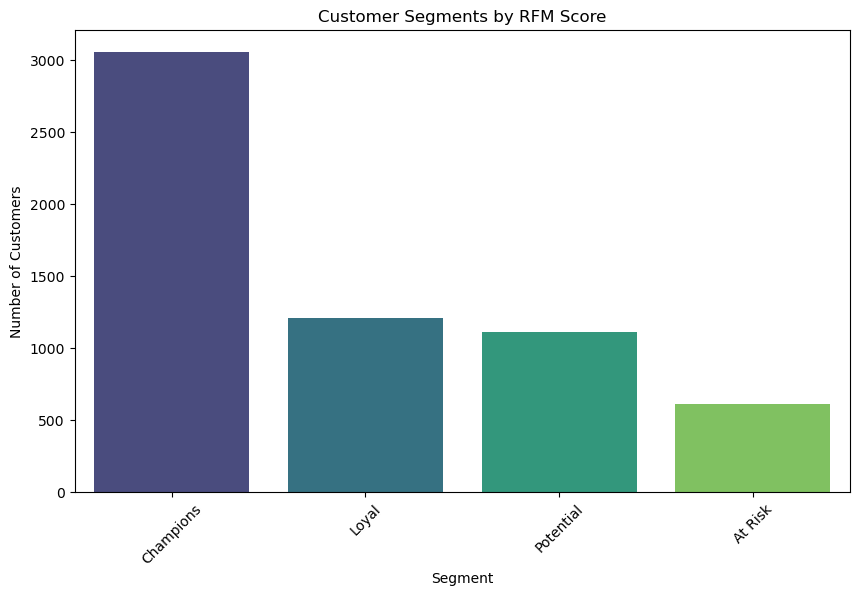

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="viridis")
plt.title("Customer Segments by RFM Score")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


### 📅 Feature Engineering: `InvoiceMonth`

Extracts the month from the invoice date to analyze monthly sales trends.

In [31]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
cohort = df.groupby("CustomerID")["InvoiceMonth"].min().reset_index()
cohort.columns = ["CustomerID", "CohortMonth"]
df = df.merge(cohort, on="CustomerID")


### 📅 Feature Engineering: `InvoiceMonth`

Extracts the month from the invoice date to analyze monthly sales trends.

In [33]:
def get_month_diff(end, start):
    return (end.year - start.year) * 12 + (end.month - start.month)

df["CohortIndex"] = df.apply(lambda row: get_month_diff(row["InvoiceMonth"].to_timestamp(), row["CohortMonth"].to_timestamp()), axis=1)


KeyboardInterrupt: 

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="BuGn")
plt.title("Monthly Retention Rate by Cohort")
plt.xlabel("Cohort Month")
plt.ylabel("Months Since First Purchase")
plt.show()


NameError: name 'retention' is not defined

<Figure size 1200x600 with 0 Axes>

In [35]:
rfm_clustering = rfm[["Recency", "Frequency", "Monetary"]].copy()


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)

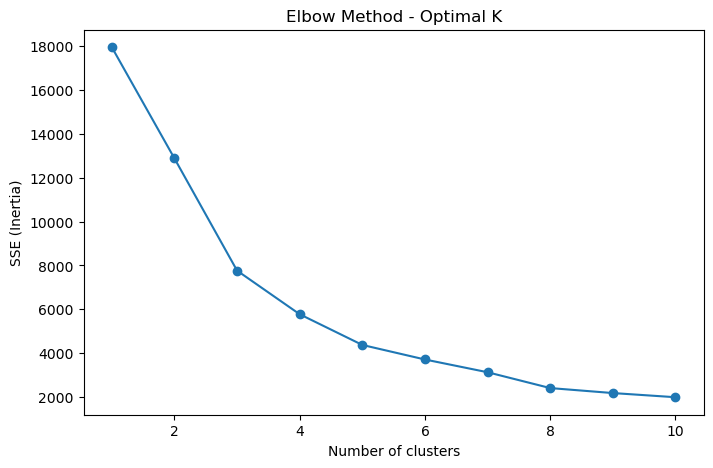

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), sse, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.show()


In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)


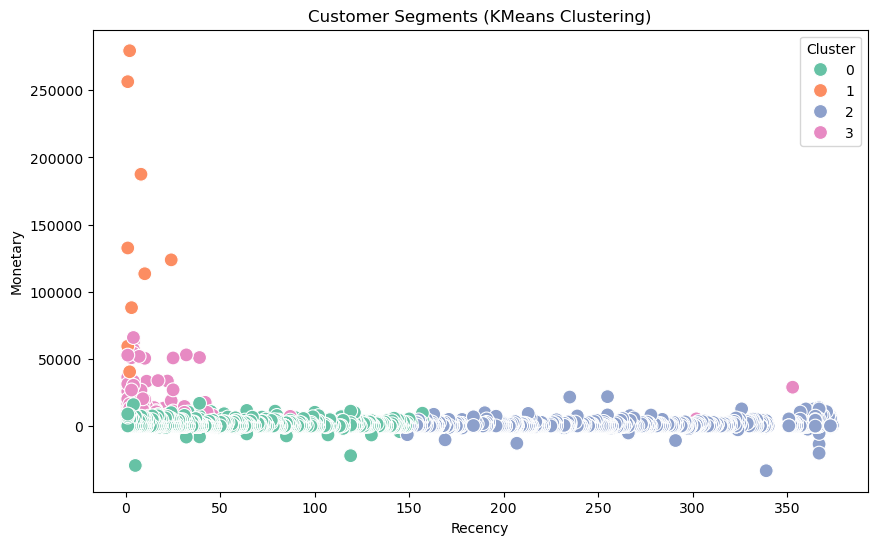

In [43]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments (KMeans Clustering)")
plt.show()


## 📊 RFM Calculation

Aggregate Recency, Frequency, and Monetary values by customer.

In [45]:
rfm.groupby("Cluster").agg({
    "Recency": ["mean", "median"],
    "Frequency": ["mean", "median"],
    "Monetary": ["mean", "median"],
    "CustomerID": "count"
}).round(1)


Recency        Frequency         Monetary           CustomerID
           mean median      mean median      mean    median      count
Cluster                                                               
0          48.1   37.0       3.7    2.0    1213.7     689.5       3860
1           5.1    2.0     109.9   77.0  124312.3  113384.1         11
2         256.2  253.0       1.7    1.0     594.6     225.8       1896
3          12.9    5.0      27.2   22.5   11889.3    7505.7        216

In [47]:
segment_map = {
    0: "Low-Value",
    1: "High-Value",
    2: "Churned",
    3: "Promising"
}
rfm["SegmentLabel"] = rfm["Cluster"].map(segment_map)


In [49]:
df = df.merge(rfm[["CustomerID", "Cluster", "SegmentLabel"]], on="CustomerID", how="left")


In [53]:
from sklearn.metrics import silhouette_score

# X_scaled: your scaled RFM data (e.g., using StandardScaler or MinMaxScaler)
# kmeans: the fitted KMeans model

score = silhouette_score(rfm_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5840


In [59]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,AmountSpent,InvoiceMonth,...,IsWeekend,IsReturn,BasketSize,IsInternational,RFM_Segment,RFM_Score,Segment,CohortMonth,Cluster,SegmentLabel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850,15.30,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850,22.00,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising


In [61]:
rfm_clustering.head()


,Recency,Frequency,Monetary
0,326,2,0.00
1,2,7,4310.00
2,75,4,1797.24
3,19,1,1757.55
4,310,1,334.40


In [65]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment,Cluster,SegmentLabel
0,12346,326,2,0.00,1,3,1,131,5,Potential,2,Churned
1,12347,2,7,4310.00,5,5,5,555,15,Champions,0,Low-Value
2,12348,75,4,1797.24,3,4,4,344,11,Champions,0,Low-Value
3,12349,19,1,1757.55,4,1,4,414,9,Champions,0,Low-Value
4,12350,310,1,334.40,1,1,2,112,4,At Risk,2,Churned


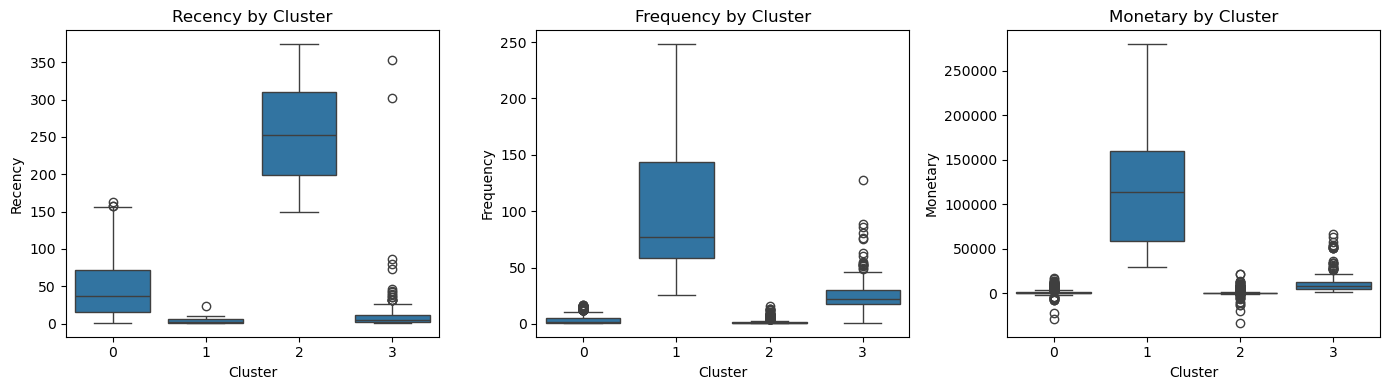

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload necessary objects assuming the session was reset
# Recreate the RFM clusters from last saved state
# We'll simulate the visualization from stored cluster_profile if available

# 1. Visualize RFM clusters
plt.figure(figsize=(14, 4))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary by Cluster')

plt.tight_layout()
plt.show()


###RFM BEHAVIOUR OVER TIME

In [69]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,AmountSpent,InvoiceMonth,...,IsWeekend,IsReturn,BasketSize,IsInternational,RFM_Segment,RFM_Score,Segment,CohortMonth,Cluster,SegmentLabel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850,15.30,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850,22.00,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising


### 📅 Feature Engineering: `InvoiceMonth`

Extracts the month from the invoice date to analyze monthly sales trends.

In [73]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Monthly RFM for each customer
monthly_rfm = df.groupby(['CustomerID', 'InvoiceMonth']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'AmountSpent': 'sum'
}).reset_index()

monthly_rfm.columns = ['CustomerID', 'Month', 'Recency', 'Frequency', 'Monetary']


In [75]:
monthly_rfm.head()

,CustomerID,Month,Recency,Frequency,Monetary
0,12346,2011-01,326,2,0.00
1,12347,2010-12,367,1,711.79
2,12347,2011-01,317,1,475.39
3,12347,2011-04,247,1,636.25
4,12347,2011-06,183,1,382.52


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top N customers for visualization
top_customers = monthly_rfm['CustomerID'].value_counts().head(5).index
sample_rfm = monthly_rfm[monthly_rfm['CustomerID'].isin(top_customers)]

sample_rfm['Month'] = sample_rfm['Month'].astype(str)


C:\Users\smogi\AppData\Local\Temp\ipykernel_1748\4186622164.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_rfm['Month'] = sample_rfm['Month'].astype(str)


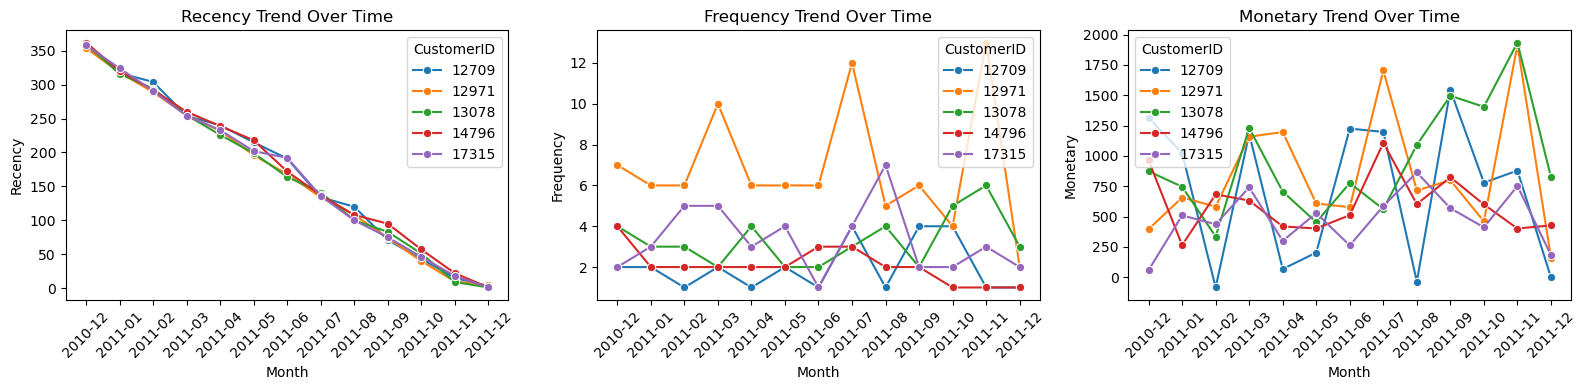

In [85]:
# Plot trends
plt.figure(figsize=(16, 4))
for metric in ['Recency', 'Frequency', 'Monetary']:
    plt.subplot(1, 3, ['Recency', 'Frequency', 'Monetary'].index(metric)+1)
    sns.lineplot(data=sample_rfm, x='Month', y=metric, hue='CustomerID', marker='o')
    plt.title(f'{metric} Trend Over Time')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [93]:
# Let's define checkpoint-saving code for various stages (modularized as reusable function calls)

# Save code checkpoints
checkpoints_code = """
# === Save Checkpoints for Important Stages ===

1. After guest ID assignment and cleaning
df.to_csv("retail_cleaned_with_guest_ids.csv", index=False)

# 2. After RFM Feature Engineering
rfm.to_csv("rfm_features.csv", index=False)

# 3. After Clustering
rfm_clustering.to_csv("rfm_with_clusters.csv", index=False)

# 4. Final merged dataset
df.to_csv("retail_final_clustered.csv", index=False)

# Optionally save as Pickle for faster reload later
df.to_pickle("retail_final_clustered.pkl")
rfm_clustering.to_pickle("rfm_with_clusters.pkl")
"""

# Display for user
checkpoints_code


'\n# === Save Checkpoints for Important Stages ===\n\n# 1. After guest ID assignment and cleaning\ndf.to_csv("retail_cleaned_with_guest_ids.csv", index=False)\n\n# 2. After RFM Feature Engineering\nrfm.to_csv("rfm_features.csv", index=False)\n\n# 3. After Clustering\nrfm_clustering.to_csv("rfm_with_clusters.csv", index=False)\n\n# 4. Final merged dataset\ndf.to_csv("retail_final_clustered.csv", index=False)\n\n# Optionally save as Pickle for faster reload later\ndf.to_pickle("retail_final_clustered.pkl")\nrfm_clustering.to_pickle("rfm_with_clusters.pkl")\n'

In [95]:
df.to_csv("retail_cleaned_with_guest_ids.csv", index=False)

In [97]:
rfm.to_csv("rfm_features.csv", index=False)

In [99]:
df.to_csv("retail_final_clustered.csv", index=False)

In [101]:
df.to_pickle("retail_final_clustered.pkl")

In [103]:
rfm_clustering.to_pickle("rfm_with_clusters.pkl")


---

## ✅ Key Insights

- **Champions** (RFM Score 444): Recently active, frequent buyers with high spending.
- **At Risk** (RFM Score 111): Haven't purchased recently and have low transaction volume.
- **Weekend vs Weekday**: Weekend shoppers may have higher volume but lower frequency.
- **Hourly Trends**: Identifying peak shopping hours helps in campaign scheduling.

---

## 📈 Next Steps

- Visualize RFM segments and behavioral trends
- Perform KMeans clustering on RFM or enhanced features
- Export to dashboard tools like Tableau or Power BI

